In [1]:
from google.colab import drive
drive.mount('/content/drive')
base_path = '/content/drive/MyDrive/PTDL/data_and_code/final_assignment'

Mounted at /content/drive


In [2]:
%pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=eb82ef2e5e6b1a3a25543c4c3a2060878a41f89f3db2d320975fb75dad44af6d
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [3]:
#import findspark
from pyspark.sql import SparkSession

def spark_session(app_name):
    spark = SparkSession.builder \
        .appName(app_name)\
        .getOrCreate()
    # To make sure that we are working with the correct version of Spark
    print("Running PySpark version: ", spark.version)
    return spark

spark = spark_session('assignment1')

Running PySpark version:  3.5.1


In [4]:
# dataset_path = '/content/drive/MyDrive/PTDL/data_and_code/final_assignment/final_assignment_dataset.csv' #dataset path string
# data = spark.read \
#     .format("csv") \
#     .option("header", "true") \
#     .option("encoding", "UTF-8") \
#     .csv(dataset_path, header=True)

dataset_path = '/content/drive/MyDrive/PTDL/data_and_code/assignment/final_assignment_dataset.csv' #dataset path string
data = spark.read.csv(dataset_path, header=True)

In [5]:
data.show()

+----------+--------------------+-------+-------+--------+-------+--------+----------+--------+
|student_id|            fullname|1st_GPA|2nd_GPA|distance| income|siblings|classmates|   class|
+----------+--------------------+-------+-------+--------+-------+--------+----------+--------+
|3121411149|Nguy?n Ng?c H?nh ...|  6.475|   5.18|     9.8|      0|       1|         3|DCT121C3|
|3121411136|        Ng� Nh?t Nam|    2.9|   2.26|      14|5000000|       1|         4|DCT121C3|
|3121411028|     Tr?n Minh Chi?n|    7.4|    6.2|     4.1|1950000|       1|         4|DCT121C3|
|3121411033|    V??ng Ti?u C??ng|   8.43|   7.99|      10|      0|       1|        15|DCT121C3|
|3121411045|??ng Nguy?n Qu?c ...|   7.35|   5.67|     7.4|      0|       3|         5|DCT121C3|
|3119411077|     Nguy?n C�ng Th?|   7.81|   7.62|      11|3000000|       0|         2|DCT119C1|
|3121411106|      ?o�n Minh Kh�i|   8.35|   7.12|     7.8|2000000|       2|         5|DCT121C3|
|3121411131|    Tr?n Ch�u H?i Mi|   7.54

In [6]:
# Count the number of rows in the DataFrame
row_count = data.count()

# Print the number of rows
print("Number of rows in the DataFrame:", row_count)

Number of rows in the DataFrame: 31


In [7]:
data.printSchema()

root
 |-- student_id: string (nullable = true)
 |-- fullname: string (nullable = true)
 |-- 1st_GPA: string (nullable = true)
 |-- 2nd_GPA: string (nullable = true)
 |-- distance: string (nullable = true)
 |-- income: string (nullable = true)
 |-- siblings: string (nullable = true)
 |-- classmates: string (nullable = true)
 |-- class: string (nullable = true)



In [8]:
from pyspark.sql.functions import col
data = data.withColumn("1st_GPA", col("1st_GPA").cast("float"))
data = data.withColumn("2nd_GPA", col("2nd_GPA").cast("float"))
data = data.withColumn("distance", col("distance").cast("float"))
data = data.withColumn("income", col("income").cast("integer"))
data = data.withColumn("siblings", col("siblings").cast("integer"))
data = data.withColumn("classmates", col("classmates").cast("integer"))


In [9]:
data.printSchema()

root
 |-- student_id: string (nullable = true)
 |-- fullname: string (nullable = true)
 |-- 1st_GPA: float (nullable = true)
 |-- 2nd_GPA: float (nullable = true)
 |-- distance: float (nullable = true)
 |-- income: integer (nullable = true)
 |-- siblings: integer (nullable = true)
 |-- classmates: integer (nullable = true)
 |-- class: string (nullable = true)



In [10]:
from pyspark.sql.functions import when, round

# Chuyển đổi giá trị null trong cột "income" thành 0
data = data.withColumn("income", when(data["income"].isNull(), 0).otherwise(data["income"]))
data = data.withColumn("classmates", when(data["classmates"].isNull(), 0).otherwise(data["classmates"]))

data.show()

+----------+--------------------+-------+-------+--------+-------+--------+----------+--------+
|student_id|            fullname|1st_GPA|2nd_GPA|distance| income|siblings|classmates|   class|
+----------+--------------------+-------+-------+--------+-------+--------+----------+--------+
|3121411149|Nguy?n Ng?c H?nh ...|  6.475|   5.18|     9.8|      0|       1|         3|DCT121C3|
|3121411136|        Ng� Nh?t Nam|    2.9|   2.26|    14.0|5000000|       1|         4|DCT121C3|
|3121411028|     Tr?n Minh Chi?n|    7.4|    6.2|     4.1|1950000|       1|         4|DCT121C3|
|3121411033|    V??ng Ti?u C??ng|   8.43|   7.99|    10.0|      0|       1|        15|DCT121C3|
|3121411045|??ng Nguy?n Qu?c ...|   7.35|   5.67|     7.4|      0|       3|         5|DCT121C3|
|3119411077|     Nguy?n C�ng Th?|   7.81|   7.62|    11.0|3000000|       0|         2|DCT119C1|
|3121411106|      ?o�n Minh Kh�i|   8.35|   7.12|     7.8|2000000|       2|         5|DCT121C3|
|3121411131|    Tr?n Ch�u H?i Mi|   7.54

In [11]:
%pip install pycryptodome

from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes
import base64
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Khởi tạo khóa bí mật
key = b'n\x1ak\x06{\x12\xeb\xe3\x19=\x91d\xad\xa7\xaeY'  # 128-bit (16 bytes) key

# Hàm để mã hóa dữ liệu
def encrypt_data(data, key):
    cipher = AES.new(key, AES.MODE_CBC)
    ct_bytes = cipher.encrypt(pad(data.encode(), AES.block_size))
    iv = base64.b64encode(cipher.iv).decode('utf-8')
    ct = base64.b64encode(ct_bytes).decode('utf-8')
    return iv + "|" + ct

# Hàm UDF để áp dụng mã hóa cho mỗi giá trị trong cột
encrypt_udf = udf(lambda x: encrypt_data(x, key), StringType())

# Áp dụng mã hóa cho các cột và thêm vào DataFrame


# Mã hóa các cột trên DataFrame hiện tại
df_encrypted = data.withColumn("student_id", encrypt_udf(col("student_id"))) \
                 .withColumn("fullname", encrypt_udf(col("fullname"))) \
                 .withColumn("class", encrypt_udf(col("class")))
# Hiển thị DataFrame sau khi mã hóa
df_encrypted.show()
# Hàm để giải mã dữ liệu
def decrypt_data(data, key):
    iv, ct = data.split("|")
    iv = base64.b64decode(iv)
    ct = base64.b64decode(ct)
    cipher = AES.new(key, AES.MODE_CBC, iv)
    pt = unpad(cipher.decrypt(ct), AES.block_size)
    return pt.decode('utf-8')

# Hàm UDF để áp dụng giải mã cho mỗi giá trị trong cột
decrypt_udf = udf(lambda x: decrypt_data(x, key), StringType())

# Áp dụng giải mã cho các cột đã mã hóa và thêm vào DataFrame
df_decrypted = df_encrypted.withColumn("student_id", decrypt_udf(df_encrypted["student_id"])) \
    .withColumn("fullname", decrypt_udf(df_encrypted["fullname"])) \
    .withColumn("class", decrypt_udf(df_encrypted["class"]))

# Hiển thị DataFrame sau khi giải mã
df_decrypted.show()

# Lưu DataFrame đã được thay đổi thành tập tin CSV
#output_path = '/content/drive/MyDrive/PTDL/data_and_code/final_assignment/final_assignment_dataset_modified/'
#df_encrypted.write.csv(output_path, header=True, mode="overwrite")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.7 MB/s eta 0:00:00
+--------------------+--------------------+-------+-------+--------+-------+--------+----------+--------------------+
|          student_id|            fullname|1st_GPA|2nd_GPA|distance| income|siblings|classmates|               class|
+--------------------+--------------------+-------+-------+--------+-------+--------+----------+--------------------+
|voA9zLY5CIWE63oQ6...|Ffubac6vq9Evacjbc...|  6.475|   5.18|     9.8|      0|       1|         3|E3TSfJhRDq/seyrpk...|
|Bl/U+bstzZEgdd3mZ...|F+r/tpUV8L8YY2tIp...|    2.9|   2.26|    14.0|5000000|       1|         4|4ZZEnbBsbfGZbdZw6...|
|+DhRimXK17LtoN4y0...|Bd4anRX4EOeNwlVz5...|    7.4|    6.2|     4.1|1950000|       1|         4|gNdWTVW5VtLX5DqSr...|
|QSIulDWNkTDeXYkuH...|B5wiZQL5Zovw9MHnk...|   8.43|   7.99|    10.0|      0|       1|        15|Za3KwA1b76sTiLFDE...|
|5/F1c1Z69lQP4Uqn9...|e7mcWGO9nUAJXP/2Z...|   7.35|   5.67|     7.4|      0|       3|         5

In [12]:
# In ra một dòng dữ liệu đã được mã hóa
df_encrypted.select("student_id").show(1, truncate=False)

# Giải mã dòng dữ liệu đó
print(decrypt_data('HS9OhhjRbrRa2yaCbfrJVA==|DS0ki98W/Yap51SfBybtRA==',key))



+-------------------------------------------------+
|student_id                                       |
+-------------------------------------------------+
|VKjuDMDFDtyBU/2C8HOYWQ==|JMDn6n8ALHZtJdLEwVj4aA==|
+-------------------------------------------------+
only showing top 1 row

3121411149


In [15]:
from pyspark.sql.functions import expr
GPA_df = df_encrypted.withColumn("GPA", round((col("1st_GPA")+col("2nd_GPA"))/2,2))
grade_df = GPA_df.withColumn("grade", expr("""CASE WHEN GPA >= 8.5 THEN 'A'
                                            WHEN GPA < 8.5 AND GPA >=7 THEN 'B'
                                            WHEN GPA >= 5.5 AND GPA <7 THEN 'C'
                                            WHEN GPA >=4 AND GPA < 5.5 THEN 'D'
                                            ELSE 'F' END"""))

grade_df.show()
output_path = '/content/drive/MyDrive/PTDL/data_and_code/assignment/final_assignment_dataset_modified/'
grade_df.write.csv(output_path, header=True, mode="overwrite")


+--------------------+--------------------+-------+-------+--------+-------+--------+----------+--------------------+----+-----+
|          student_id|            fullname|1st_GPA|2nd_GPA|distance| income|siblings|classmates|               class| GPA|grade|
+--------------------+--------------------+-------+-------+--------+-------+--------+----------+--------------------+----+-----+
|k6DmIa7gsFGJToipT...|/aiu/CP6fzGNp77b6...|  6.475|   5.18|     9.8|      0|       1|         3|JSr8yn22jaupzcezU...|5.83|    C|
|CWG/1jmI6Qi/Tv1R5...|DPF0c5iJo05/sYfh3...|    2.9|   2.26|    14.0|5000000|       1|         4|6NMV0uh7WnXgCdF/w...|2.58|    F|
|6bza2J7OezbfxcnED...|zAfWIu3wwU5RbSQ7+...|    7.4|    6.2|     4.1|1950000|       1|         4|V07/3xd7yixwsVJw+...| 6.8|    C|
|ET9BzIBWt1kS7Yn0t...|KO/ho74n7/YjiKJng...|   8.43|   7.99|    10.0|      0|       1|        15|Lzbz1S/51jVJbHTxg...|8.21|    B|
|uRA86ZjjlTLvWB1//...|XdzPSzcdSaHdH22hE...|   7.35|   5.67|     7.4|      0|       3|         5|N

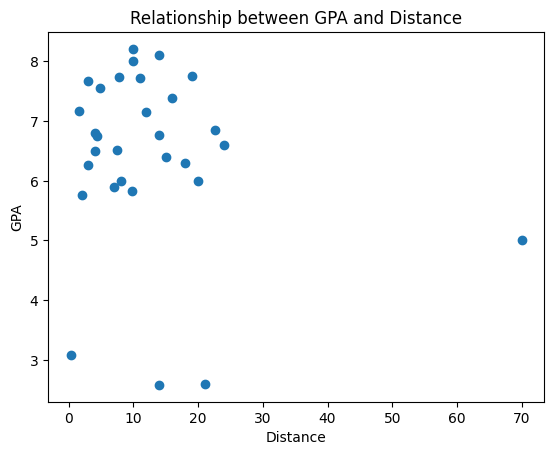

In [20]:
import matplotlib.pyplot as plt

# Assuming 'df_encrypted' is a Pandas DataFrame with columns 'GPA' and 'distance'
pdf = GPA_df.toPandas()
# Extract GPA and distance values into separate lists
gpa_values = pdf['GPA'].tolist()
distance_values = pdf['distance'].tolist()

# Create a scatter plot
plt.scatter(distance_values, gpa_values)

# Set axis labels and title
plt.xlabel('Distance')
plt.ylabel('GPA')
plt.title('Relationship between GPA and Distance')

# Display the plot
plt.show()

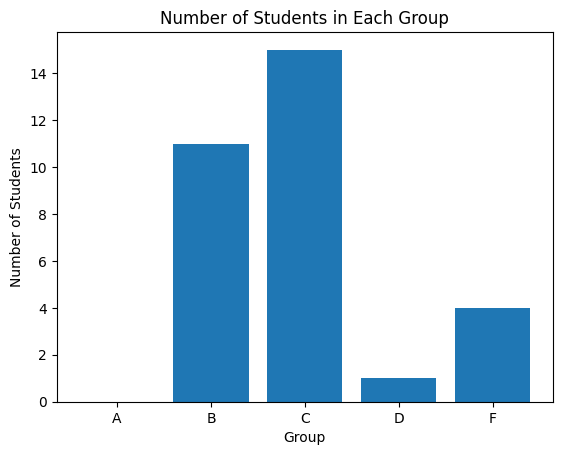

In [21]:
# prompt: visualize how many students in each group
# Failure group who has GPA under 5
# Satisfied group who has GPA from 5 to 7.9
# Good group who has GPA from 8 to 8.9
# Excellence group who has GPA greater or equal 9

# Count the number of students in each group

A_count = grade_df.filter(grade_df["grade"] == 'A').count()
B_count = grade_df.filter(grade_df["grade"] == 'B').count()
C_count = grade_df.filter(grade_df["grade"] == 'C').count()
D_count = grade_df.filter(grade_df["grade"] == 'D').count()
F_count = grade_df.filter(grade_df["grade"] == 'F').count()
# Create a bar chart
labels = ["A","B","C","D","F"]
values = [A_count, B_count, C_count, D_count, F_count]
plt.bar(labels, values)

# Set axis labels and title
plt.xlabel("Group")
plt.ylabel("Number of Students")
plt.title("Number of Students in Each Group")

# Display the bar chart
plt.show()


In [24]:
distance_groups =grade_df.withColumn("distance_group", expr("""CASE WHEN distance <5 THEN 'less than 5km'
                                                             WHEN distance >=5 AND distance <=10 THEN 'from 5 to 10km'
                                                             WHEN distance > 10 AND distance <15 THEN 'from 10 to 15km'
                                                             WHEN distance >= 15 AND distance < 20 THEN 'from 15 to 20km'
                                                             ELSE 'greater than 20km' END"""))

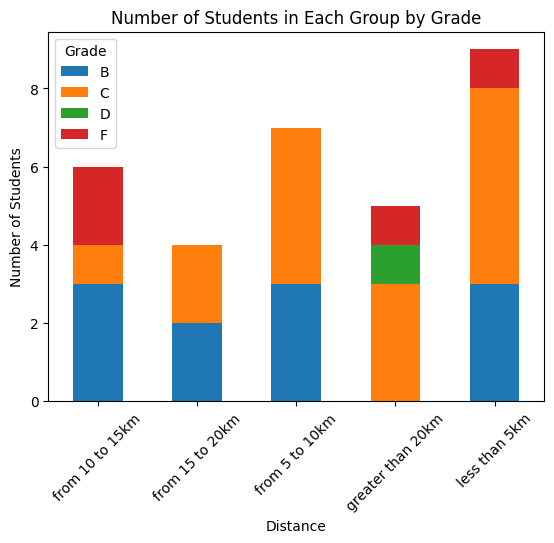

In [26]:
# prompt: visualize stacked barplot to show how many students have grade A, B, C, D in each group distance less than 5km, distance from 5 to 10km, distance from 15 to 20 km and >20km

# Extract the required columns into Pandas DataFrame
pdf = distance_groups.select('distance_group', 'grade').toPandas()

# Group the data by distance and grade
grouped_pdf = pdf.groupby(['distance_group', 'grade']).size().unstack().fillna(0)
#grouped_pdf.show()
# Create stacked bar plot
grouped_pdf.plot(kind='bar', stacked=True)

# Set axis labels and title
plt.xlabel('Distance')
plt.ylabel('Number of Students')
plt.title('Number of Students in Each Group by Grade')
plt.xticks(rotation = 45)
# Add legend
plt.legend(title='Grade')

# Display the plot
plt.show()


GPA VS income

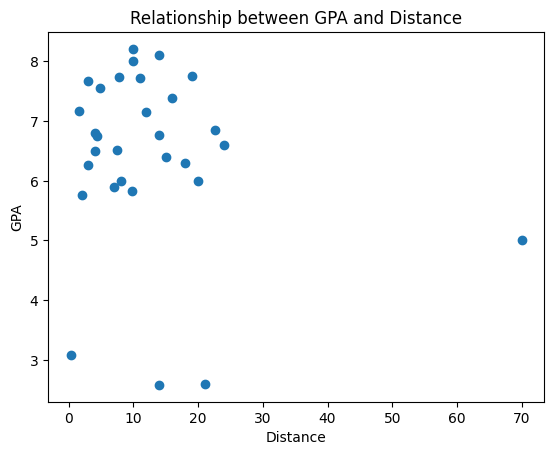

In [27]:
import matplotlib.pyplot as plt

# Assuming 'df_encrypted' is a Pandas DataFrame with columns 'GPA' and 'distance'
pdf = GPA_df.toPandas()
# Extract GPA and distance values into separate lists
gpa_values = pdf['GPA'].tolist()
distance_values = pdf['distance'].tolist()

# Create a scatter plot
plt.scatter(distance_values, gpa_values)

# Set axis labels and title
plt.xlabel('Distance')
plt.ylabel('GPA')
plt.title('Relationship between GPA and Distance')

# Display the plot
plt.show()

**GPA** VS *income*

Biểu đồ **cột**

In [ ]:
income_groups =grade_df.withColumn("income_group", expr("CASE WHEN income <1000000 THEN 'less than 1M' WHEN income >=1000000 AND income <2000000 THEN 'from 1M to 2M' WHEN income >= 2000000 AND income <3000000 THEN 'from 2M to 3M' WHEN income >= 3000000 AND income < 4000000 THEN 'from 3M to 4M' ELSE 'greater than 4M' END"))

In [ ]:

# Extract the required columns into Pandas DataFrame
pdf = income_groups.select('income_group', 'grade').toPandas()

# Group the data by income and grade
grouped_pdf = pdf.groupby(['income_group', 'grade']).size().unstack().fillna(0)

# Create stacked bar plot
grouped_pdf.plot(kind='bar', stacked=True)

# Set axis labels and title
plt.xlabel('Income')
plt.ylabel('Number of Students')
plt.title('Number of Students in Each Group by Grade')
plt.xticks(rotation = 45)
# Add legend
plt.legend(title='Grade')

# Display the plot
plt.show()


scatter

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df_encrypted' is a Pandas DataFrame with columns 'GPA' and 'income'
pdf = GPA_df.toPandas()
# Extract GPA and income values into separate lists
gpa_values = pdf['GPA'].tolist()
income_values = pdf['income'].tolist()

# Create a scatter plot
plt.scatter(income_values, gpa_values)

# Set axis labels and title
plt.xlabel('Income')
plt.ylabel('GPA')
plt.title('Relationship between GPA and Income')

# Display the plot
plt.show()

biểu đồ hộp

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your PySpark DataFrame
pdf = income_groups.toPandas()  # Convert PySpark DataFrame to Pandas DataFrame

# Create a box plot of GPA vs income
sns.boxplot(
    x = "grade",
    y = "income",
    showmeans=True,
    data=pdf
)

# Rotate x-axis labels to prevent overlapping
plt.xticks(rotation=45)
plt.title("Box Plot of GPA vs Income")
plt.show()


************Tổng hợp****************

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử 'df_encrypted' là một PySpark DataFrame với các cột 'GPA', 'income', 'distance', 'siblings', 'classmates'
pdf = GPA_df.toPandas()

# Biểu đồ cột
plt.figure(figsize=(15, 5))

plt.subplot(131)  # Subplot 1
sns.barplot(x='GPA', y='income', data=pdf)
plt.title('GPA vs Income')
plt.xticks(rotation = 45)

plt.subplot(132)  # Subplot 2
sns.barplot(x='GPA', y='distance', data=pdf)
plt.title('GPA vs Distance')
plt.xticks(rotation = 45)

plt.subplot(133)  # Subplot 3
sns.barplot(x='GPA', y='siblings', data=pdf)
plt.title('GPA vs Siblings')
plt.xticks(rotation = 45)
plt.tight_layout()  # Căn chỉnh các subplot
plt.show()

# Biểu đồ scatter
plt.figure(figsize=(15, 5))

plt.subplot(131)  # Subplot 1
plt.scatter(pdf['GPA'], pdf['income'])
plt.xlabel('GPA')
plt.ylabel('Income')
plt.title('GPA vs Income')
plt.xticks(rotation = 45)
plt.subplot(132)  # Subplot 2
plt.scatter(pdf['GPA'], pdf['distance'])
plt.xlabel('GPA')
plt.ylabel('Distance')
plt.title('GPA vs Distance')

plt.subplot(133)  # Subplot 3
plt.scatter(pdf['GPA'], pdf['siblings'])
plt.xlabel('GPA')
plt.ylabel('Siblings')
plt.title('GPA vs Siblings')

plt.tight_layout()  # Căn chỉnh các subplot
plt.show()

# Biểu đồ hộp
plt.figure(figsize=(15, 5))

plt.subplot(131)  # Subplot 1
sns.boxplot(x='GPA', y='income', data=pdf)
plt.title('GPA vs Income')
plt.xticks(rotation = 45)

plt.subplot(132)  # Subplot 2
sns.boxplot(x='GPA', y='distance', data=pdf)
plt.title('GPA vs Distance')
plt.xticks(rotation = 45)

plt.subplot(133)  # Subplot 3
sns.boxplot(x='GPA', y='siblings', data=pdf)
plt.title('GPA vs Siblings')
plt.xticks(rotation = 45)
plt.tight_layout()  # Căn chỉnh các subplot
plt.show()
